In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./data/rqa_results-4.csv')

In [3]:
data.drop(columns='Unnamed: 0', inplace = True)

In [4]:
data

,determinism,recurrence_rate,entropy,longest_diagonal_line,average_diagonal_line,laminarity,divergence,no_messages,diversity,diversity_bin,time,high_performance,female_majority,revise_score,full_credit,half_credit,task,task_numeric
0,0.561449,0.266930,1.083095,8,2.630303,0.725369,0.125000,78,3,1,1169,0,1,0.00,0,0,Professor,0
1,0.407480,0.215632,0.768094,8,2.435294,0.681693,0.125000,71,2,0,731,0,1,0.00,0,0,Professor,0
2,0.276596,0.202938,0.655482,3,2.363636,0.538462,0.333333,33,3,1,684,0,0,0.00,0,0,Professor,0
3,0.455988,0.208333,0.711437,6,2.323529,0.604082,0.166667,84,4,1,1699,0,0,0.00,0,0,Professor,0
4,0.467005,0.207940,0.755876,4,2.358974,0.663636,0.250000,46,1,0,869,0,1,0.00,0,0,Professor,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.339286,0.167658,0.661563,3,2.375000,0.453901,0.333333,29,3,1,439,0,1,0.25,0,0,apartment,3
125,0.413333,0.200000,0.983088,5,2.583333,0.661111,0.200000,30,3,1,537,0,1,0.00,0,0,apartment,3
126,0.523962,0.285467,1.071138,7,2.624000,0.701515,0.142857,68,3,1,1218,1,1,1.00,0,1,apartment,3
127,0.645486,0.304891,1.027407,9,2.579685,0.790316,0.111111,124,4,1,1558,1,0,2.00,1,1,apartment,3


In [8]:
measures = ['revise_score', 'determinism', 'divergence', 'entropy', 'laminarity', 'longest_diagonal_line', 
            'recurrence_rate', 'time', 'average_diagonal_line', 'no_messages']

In [9]:
np.std([1,4,5])

1.699673171197595

In [23]:
results = pd.DataFrame()
results['measures'] = measures
res_full = []
for i in [1, 2, 3, 4]:
    res = []
    for j in measures:
        d = data[data['diversity']==i][j]
        res.append((round_decimals_up(np.mean(d)), round_decimals_up(np.std(d))))
    results[str(i)] = res

    
for i in measures:
    d = data[i]
    res_full.append((round_decimals_up(np.mean(d)), round_decimals_up(np.std(d))))
results['full_sample'] = res_full


In [53]:
results.to_csv('./data/mean_sd.csv')

In [13]:
import math


def round_decimals_up(number:float, decimals:int=2):
    """
    Returns a value rounded up to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.ceil(number)

    factor = 10 ** decimals
    return math.ceil(number * factor) / factor

In [14]:
round_decimals_up(0.21428571428571427)

0.22

In [25]:
# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4,8]), :]

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="displ", y="hwy", hue="cyl", data=df_select, 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

# Decorations
gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatterplot with line of best fit grouped by number of cylinders", fontsize=20)
plt.show()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1123)>

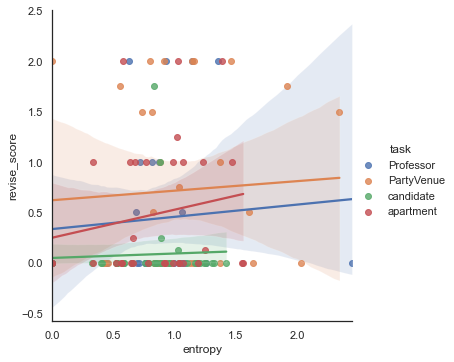

In [51]:
import seaborn as sns
sns.set_theme(color_codes=True)
# tips = sns.load_dataset("tips")
sns.set_style("white")
g = sns.lmplot(x="entropy", y="revise_score", hue = 'task', data=data)

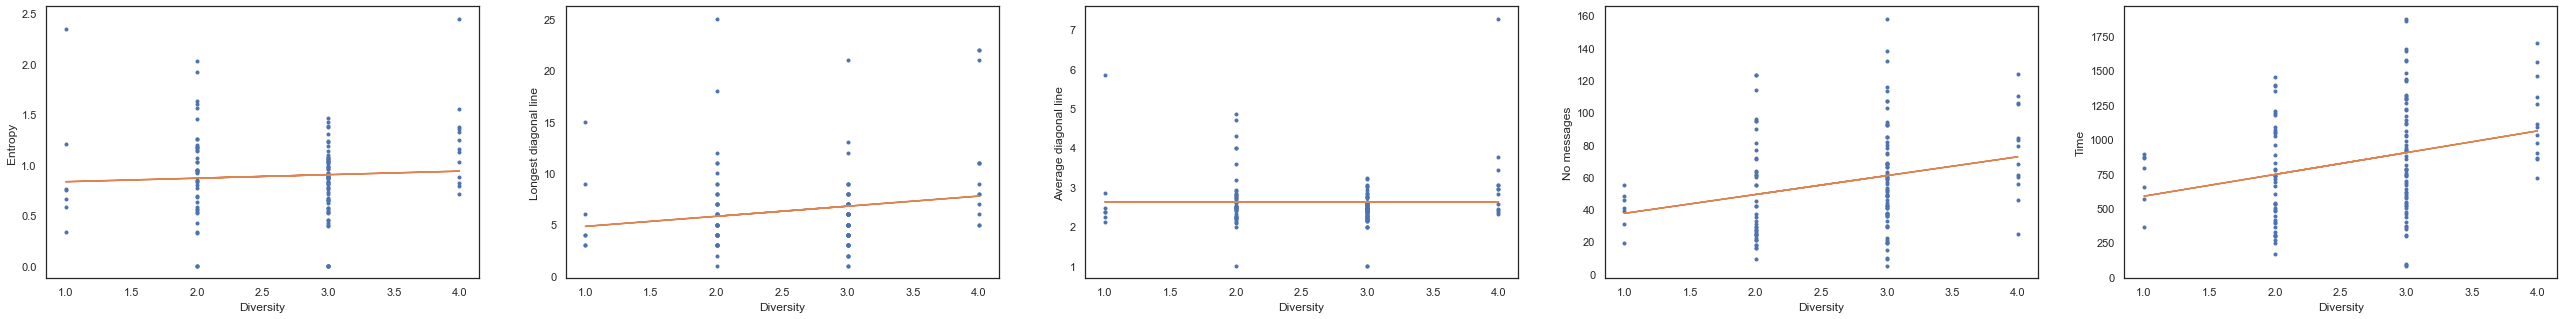

In [49]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

mes = ['entropy', 'longest_diagonal_line', 'average_diagonal_line', 'no_messages', 'time']
# plt.plot(figsize = (40, 400))
fig, (axes) = plt.subplots(1, 5, figsize = (45,5))
plt.rcParams.update({'font.size': 50})

for i in range(5):  
    # Sample data
    x = data.diversity
    y = data[mes[i]]
    
    # Fit with polyfit
    sns.set_style("white")
    #fig.suptitle('fig 2. Conversational measure plotted by diversity')
#     ax1.plot(x, y)
#     ax2.plot(x, -y)
    b, m = polyfit(x, y, 1)
    axes[i].plot(x, y, '.')
    axes[i].plot(x, b + m * x, '-')
#     plt.xlabel('diversity')
#     plt.ylabel(i)
    axes[i].set(xlabel='Diversity', ylabel=mes[i].replace("_", " ").capitalize())
plt.savefig('./plots/graphs.png')
plt.show()

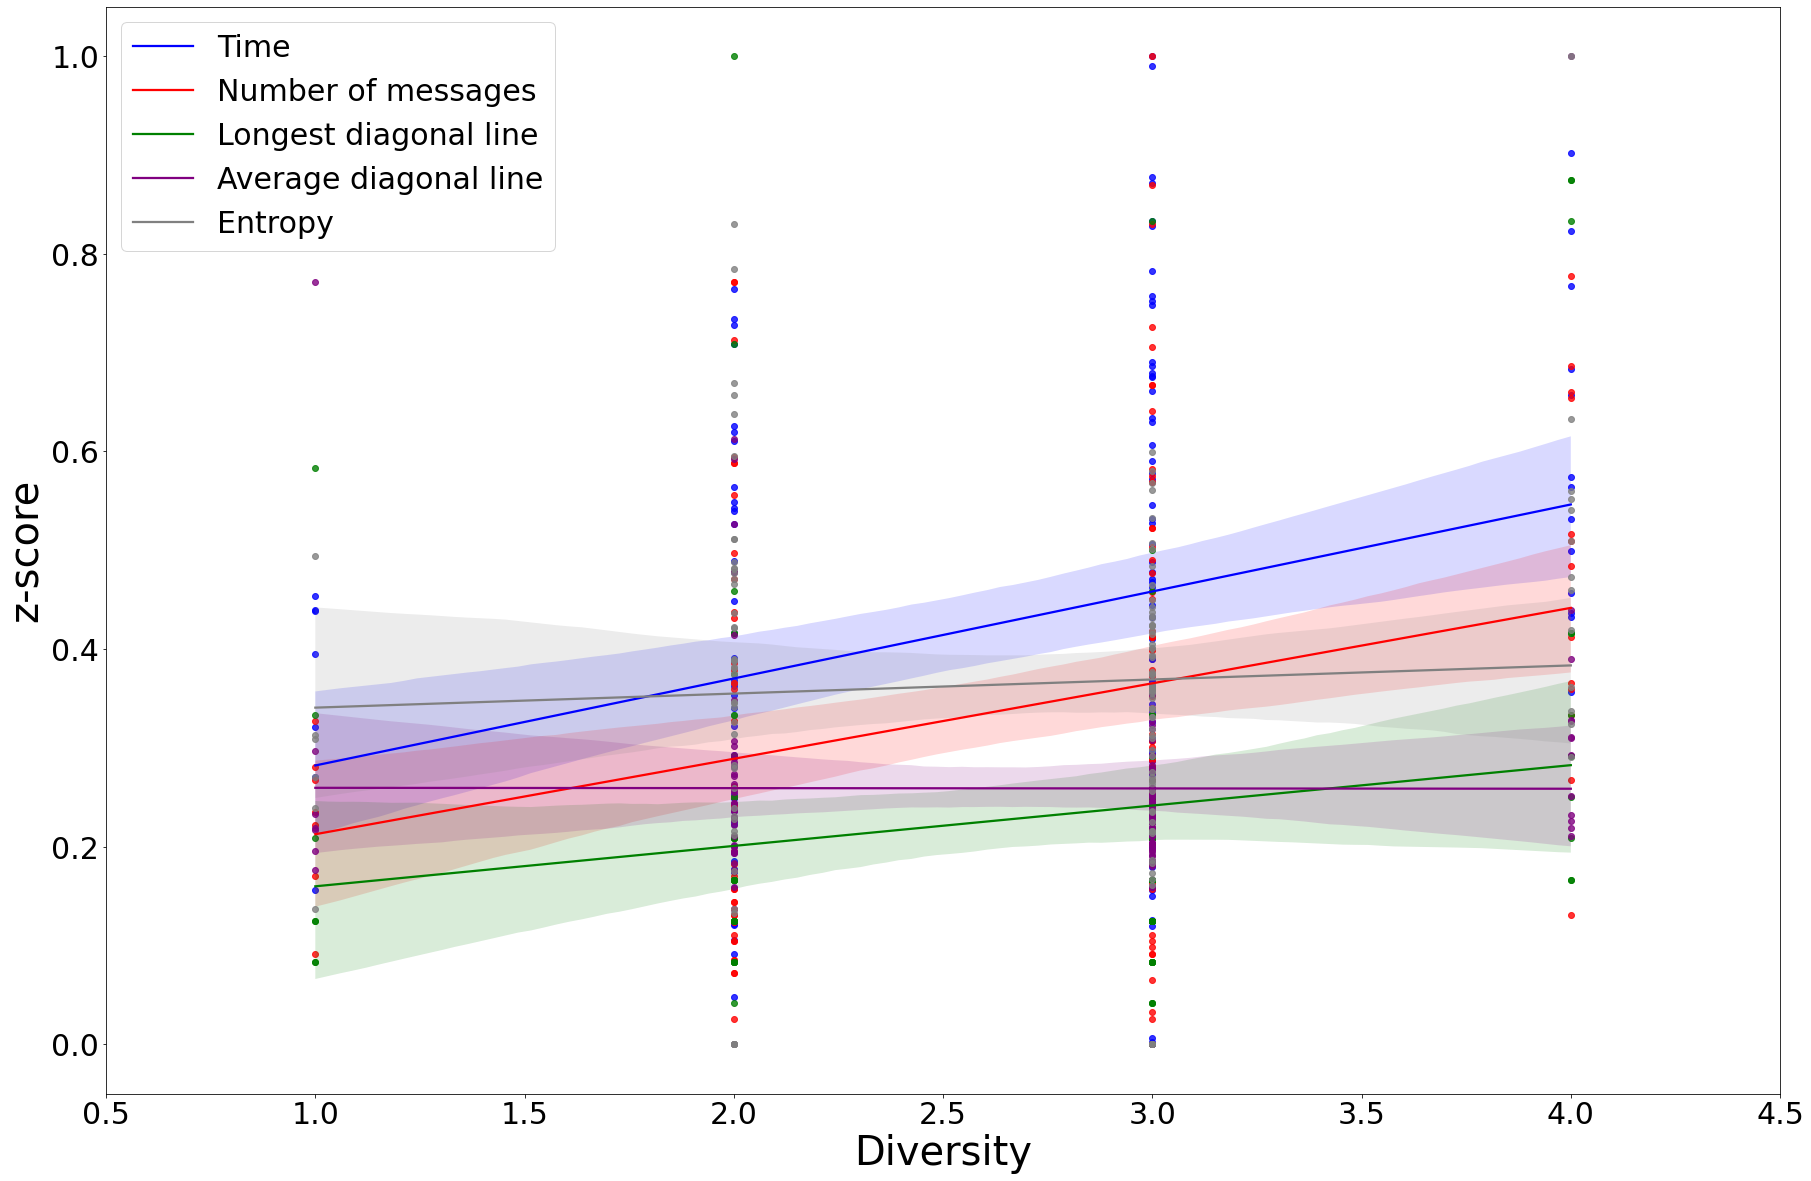

In [40]:
import seaborn as sns
plt.rcParams.update({'font.size': 30})
# regression plot using seaborn
fig = plt.figure(figsize=(30, 20))
sns.regplot(x=data.diversity, y=[(i-min(data.time))/(max(data.time)-min(data.time)) for i in data.time], color='blue')
sns.regplot(x=data.diversity, y=[(i-min(data.no_messages))/(max(data.no_messages)-min(data.no_messages)) for i in data.no_messages], color='red')
sns.regplot(x=data.diversity, y=[(i-min(data.longest_diagonal_line))/(max(data.longest_diagonal_line)-min(data.longest_diagonal_line)) for i in data.longest_diagonal_line], color='green')
sns.regplot(x=data.diversity, y=[(i-min(data.average_diagonal_line))/(max(data.average_diagonal_line)-min(data.average_diagonal_line)) for i in data.average_diagonal_line], color='purple')
sns.regplot(x=data.diversity, y=[(i-min(data.entropy))/(max(data.entropy)-min(data.entropy)) for i in data.entropy], color='grey')
# Legend, title and labels.
plt.legend(labels=['Time', 'Number of messages', 'Longest diagonal line', 'Average diagonal line', 'Entropy'])
#plt.title('Relationship of cultural diversity and conversational measures', size=20)
plt.xlim([0.5, 4.5])
plt.xlabel('Diversity', size=40)
plt.ylabel('z-score', size=40);
plt.savefig('./plots/multi-fig.png')

In [6]:
[(i-min(data.time))/(max(data.time)-min(data.time)) for i in data.time]

[0.6064659977703456,
 0.36231884057971014,
 0.33612040133779264,
 0.9018952062430323,
 0.43924191750278707,
 0.6767001114827201,
 0.4319955406911929,
 0.37402452619843923,
 0.7642140468227425,
 0.36845039018952064,
 0.5267558528428093,
 0.1778149386845039,
 0.2798216276477146,
 0.35618729096989965,
 0.43645484949832775,
 0.5490523968784838,
 0.20066889632107024,
 0.5741360089186176,
 0.4882943143812709,
 0.6794871794871795,
 0.48940914158305465,
 0.47045707915273133,
 0.6254180602006689,
 0.23244147157190637,
 0.17391304347826086,
 0.3210702341137124,
 0.8277591973244147,
 0.782051282051282,
 0.3896321070234114,
 0.5635451505016722,
 0.7341137123745819,
 0.44871794871794873,
 0.572463768115942,
 0.326644370122631,
 0.12430323299888517,
 0.6610925306577481,
 0.28651059085841696,
 0.2491638795986622,
 0.6867335562987736,
 0.2480490523968785,
 0.39018952062430323,
 0.5395763656633222,
 0.6198439241917503,
 1.0,
 0.4158305462653289,
 0.24972129319955408,
 0.3656633221850613,
 0.32218506131

In [ ]:
zi = (xi – min(x)) / (max(x) – min(x))